## F ランダムフォレスト回帰の学習

この節の目標は、ランダムフォレスト回帰の学習の様子を理解することです。入力$X$に対して出力$y$が非線形な関係にある問題を準備し、ランダムフォレスト回帰にこれを学習させます。学習ののち、ランダムフォレスト回帰が入力$X$に対してどのような予測値$f(X)$を返すようになったのかを、入力と予測値のグラフを描くことで確認します。

#### データの生成
以下のような訓練データセットを準備します。
* 入力 $X_{train}$ : 区間$[0,1]$上に等間隔に配置された100個の値
* 出力 $y_{train}$ : $y_{train} = (X_{train} - 0.5)^2 + ε$

ここで、εは平均0, 標準偏差0.1の正規分布$N(0, 0.1^2)$に従って決まる確率変数とします。要はεは誤差です。

In [1]:
# データを生成する。
import numpy as np
X_train = np.linspace(start = 0, stop = 1, num = 100)
y_train = (X_train - 0.5) ** 2 + np.random.normal(loc = 0, scale = 0.1, size = 100)

In [2]:
# X_trainのshape
X_train.shape

(100,)

In [3]:
# y_trainのshape
y_train.shape

(100,)

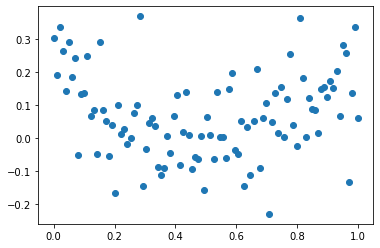

In [4]:
# X_trainとy_trainの散布図を描く。
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.show()

#### ランダムフォレスト回帰のsckit-learnによる実装
scikit-learnモジュールにはランダムフォレスト回帰のクラス`RandomForestRegressor`が準備されています。今回はこれを用いてランダムフォレスト回帰の学習を行いましょう。

ランダムフォレスト回帰は決定木のハイパーパラメータのほかに「弱学習器の数」・「決定木の各ノードを決定する際に参照する特徴量の最大数」というハイパーパラメータがあり、`RandomForestRegressor` classでは
* `n_estimators` : 弱学習器の個数
* `max_features` : 決定木の各ノードを決定する際に参照する特徴量の最大数

というインスタンス変数で指定することができます。今回は入力変数が1変数しかなくノードの特徴量の最大数は自動的に1なので、`n_estimators=100`を指定することにします。また、決定木のハイパーパラメータを`max_leaf_nodes = 5`に指定します。

In [5]:
# ランダムフォレスト回帰のインスタンスを立てる。
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 100, max_leaf_nodes = 5)

In [6]:
# X_trainのshapeの確認
X_train.shape

(100,)

In [7]:
# fitメソッドに渡すための整形
X_train = X_train.reshape(100, 1)

In [8]:
RFR.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=5)

#### ランダムフォレスト回帰の学習結果の確認
ランダムフォレスト回帰の学習の結果を確認するために、入力$X_{test}$として区間$[0,1]$上に100個の点を等間隔に生成し、学習済みのランダムフォレスト回帰がこれらの入力に対して与える予測値$f(X_{test})$を計算します。さらに、入力$X$と予測値$f(X_{test})$関係を先ほどの散布図上に描画しましょう。

ランダムフォレスト回帰の予測値の計算は`predict`メソッドで実行できます。

In [9]:
# 予測値を計算するための入力を生成
X_test = np.linspace(0, 1, 10)

In [10]:
# predictメソッドに渡すために整形する。
X_test = X_test.reshape(10, 1)

In [11]:
# 予測値を計算する。
y_pred = RFR.predict(X_test)
y_pred

array([0.22633421, 0.1161044 , 0.03324258, 0.00959407, 0.00451353,
       0.00459542, 0.01941041, 0.10223977, 0.13139554, 0.14401562])

入力と予測値の関係を散布図で表現しましょう。matplotlib.pyplot.scatter関数のために訓練データおよびテストデータの入力$X_{train}, X_{test}$のshapeをそれぞれ(100,), (100,)に戻す必要があることに注意しましょう。

In [12]:
# matplotlib.pyplot.scatterのために入力を整形する。
X_train = X_train.reshape(100)
X_test = X_test.reshape(10)

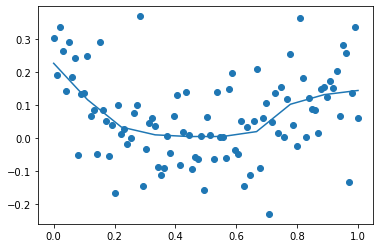

In [13]:
# 入力と出力、予測値を散布図に図示する。
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()

#### ランダムフォレスト回帰の学習の数理
**ランダムフォレスト回帰**は、
1. 訓練データからn個のブートストラップ標本を作る。
2. n個の標本それぞれに決定木回帰を学習させ、n個の学習済み決定木回帰を作る。

このn個の決定木回帰の平均値でもって予測値を決定するような学習器です。ここで**ブートストラップ標本**とは、サイズ$m$の標本を決められた回数$n$だけ復元抽出で再標本化することによって、$n$個の標本を作る操作を指します。例えば、サイズ5の標本$\{1,2,3,4,5\}$を4回ブートストラップすることは、以下のような操作に対応します。

In [14]:
sample = np.array([1, 2, 3, 4, 5])    # 元の標本
for i in range(4):
    resample = np.random.choice(a = sample, size = 5, replace = True)    # 復元抽出による再標本
    print("再標本", i, ":", resample)

再標本 0 : [5 4 5 5 4]
再標本 1 : [1 2 5 4 1]
再標本 2 : [3 5 5 3 3]
再標本 3 : [5 4 1 1 2]


`RandomForestRegressor`クラスの`n_estimators`引数は決定木回帰の個数（すなわちブートストラップの回数）に対応しています。

このように弱学習器を複数作って組み合わせるような手法は**アンサンブル学習**と呼ばれています。ランダムフォレスト回帰もアンサンブル学習の一手法です。アンサンブル学習の弱学習器には、データに対してロバスト性がない学習器（**不安定な学習器**）が望ましいことが知られているので、一般には今回のように決定木学習が採用されます。

また、ランダムフォレスト回帰は決定木回帰の各ノードを決定する際に、すべての入力変数のなかから分割に用いる軸を探すのではなく、ランダムに$d$個選んできたもののなかから選択します。この$d$を指定するのが`max_features`です。このランダムな入力変数の選択よってデータに対するロバスト性をさらに向上することに成功しました。

## F　ランダムフォレスト回帰の性質
ランダムフォレスト回帰は
* 過剰適合しづらい。
* データに対してロバスト性がある。

という性質があることが知られています。これは実験的にわかっているだけでなく、数理統計の議論によって確かめられています。これは決定木回帰の弱点を克服しているという意味で、特筆すべき性質です。これらの性質を確認するため、訓練データだけを変えたときにランダムフォレスト回帰の入力に対する予測値のグラフがどれくらい変化するのかを見てみます。

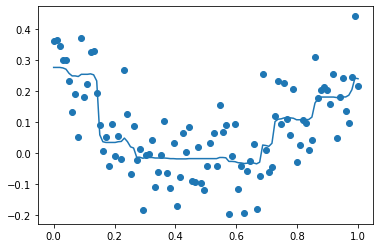

In [15]:
# 前節の一連のスクリプトまとめ（何度か繰り返し実行して、結果の違いを見る。）
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

X_train = np.linspace(start = 0, stop = 1, num = 100)
y_train = (X_train - 0.5) ** 2 + np.random.normal(loc = 0.0, scale = 0.1, size = 100)

X_train = X_train.reshape(100, 1)

RFR = RandomForestRegressor(max_leaf_nodes = 5, n_estimators = 100)
RFR.fit(X_train, y_train)

X_test = np.linspace(0, 1, 100)
X_test = X_test.reshape(100, 1)
y_pred = RFR.predict(X_test)

X_train = X_train.reshape(100)
X_test = X_test.reshape(100)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()

参考のために、同じ条件で決定木回帰の学習を行い、ランダムフォレスト回帰の場合と見比べてみましょう。決定木回帰は何度か繰り返しているとしばしば突飛な予測値を返すような分割領域をもつ学習器が作られ、データに過剰適合しているかつデータの変化に弱い傾向が見て取れます。

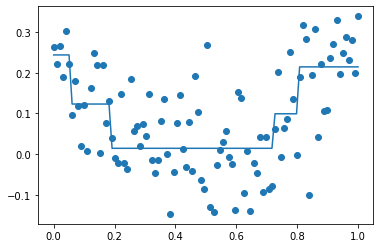

In [16]:
# 上の一連のスクリプトまとめ
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

X_train = np.linspace(start = 0, stop = 1, num = 100)
y_train = (X_train - 0.5) ** 2 + np.random.normal(loc = 0.0, scale = 0.1, size = 100)

X_train = X_train.reshape(100, 1)

DTR = DecisionTreeRegressor(max_leaf_nodes = 5)
DTR.fit(X_train, y_train)

X_test = np.linspace(0, 1, 100)
X_test = X_test.reshape(100, 1)
y_pred = DTR.predict(X_test)

X_train = X_train.reshape(100)
X_test = X_test.reshape(100)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()

## G　ランダムフォレスト回帰による変数重要度
ランダムフォレスト回帰も決定木回帰と同様に各変数の変数重要度を計算することが出来ます。これは、弱学習器である決定木回帰の変数重要度の単純平均によって算出されます。

決定木回帰1個による変数重要度には、学習時に分割領域の決定に採用されなかった変数の重要度を算出できないという欠点があります。これは仮にとある変数が重要でも、より重要な変数によってその変数の重要性を見逃す可能性があることを指します。しかし、ランダムフォレスト回帰では、訓練データをブートストラップ標本で取り換えて学習した様々な決定木回帰の変数重要度の平均によって変数重要度を計算するため、重要な変数を見逃すリスクを減らせるという長所があります。

scikit-learnの`RandomForestRegressor`クラスでは、`DecisionTreeRegressor`クラスと同様に訓練データの学習ののちインスタンス変数`feature_importances_`にこの計算結果が代入されます。

以下のような訓練データセットを準備します。
* 入力 $X_{train}$ : 区間$[-1,1]×[-1,1]$上に格子状に配置された9個の点
* 出力 $y_{train}$ : $y_{train} = X_{train}[:, 0]^2 + X_{train}[:, 1]^2$

出力は入力の第0変数の値と第1変数の値の2乗和で与えています。

In [17]:
# 訓練データの入力の生成
a = np.linspace(start = -1, stop = 1, num = 100)
b = np.linspace(start = -1, stop = 1, num = 100)
x0_train, x1_train = np.meshgrid(a, b)
X_train = np.c_[x0_train.ravel(), x1_train.ravel()]
X_train.shape

(10000, 2)

In [18]:
# 訓練データの出力の生成
y_train = X_train[:, 0]**2 + X_train[:, 1]**2
y_train.shape

(10000,)

In [19]:
# ランダムフォレスト回帰のインスタンスを立てる。
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(max_leaf_nodes = 5, n_estimators = 100)
RFR.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=5)

In [20]:
RFR.feature_importances_

array([0.49947803, 0.50052197])

今回、ランダムフォレスト回帰の変数重要度の計算の結果、どちらの変数重要度もほぼ0.5という結果でした。これはどちらの変数も予測値の決定に同じくらい貢献していることを意味しています。

実際、データを生成する際に入力と出力の関係は
* 出力 $y_{train}$ : $y_{train} = X_{train}[:, 0]^2 + X_{train}[:, 1]^2$

で決めたので、入力の第0変数と入力の第1変数のうち、特にどちらが予測値の決定により重要ということはなさそうであることが分かるので、今回の変数重要度の計算結果も頷ける結果と言えるでしょう。